# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('Ad_click_dataset.csv')

# Calculate the CTR 

In [3]:
df['CTR'] = df['Clicked on Ad'].mean()

# Printing the information from the dataset

In [4]:
df.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad     CTR  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  0.4917  
1                     Singapore  2016-01-16 17:56:05              0  0.4917  
2                    Guadeloupe  2016-06-29 10:50:45              0  0.4917  
3                        Zambia  2016-06-21 14:32:32              0  0.4917  
4                         Qatar  2016-07-21 10:54:35              1  0.4917

In [5]:
df.tail()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   
9999                     46.61  43.0     60575.99                198.45   

                               Ad Topic Line             City  Gender  \
9995          Profound executive flexibility  West Angelabury    Male   
9996          Managed zero tolerance concept      Kennedyfurt    Male   
9997          Intuitive exuding service-desk      North Randy  Female   
9998        Realigned content-based leverage   North Samantha  Female   
9999  Optimized upward-trending productivity     Port Jeffrey    Male   

                       Country            Timestamp  Clicked on Ad     CTR  
9995                 Singapore  2016-01-03 03:22:15              1  0.4917  
9996                Luxembourg  2016-05-28 12:20:15              0  0.4917  
9997                     Egypt  2016-01-05 11:53:17              0  0.4917  
9998                    Malawi  2016-04-04 07:07:46              1  0.4917  
9999  Northern Mariana Islands  2016-04-03 21:13:46              1  0.4917

In [6]:
df.sample(10)

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
8984                     89.05  50.0     43778.88                122.31   
6436                     41.73  34.0     20592.99                168.34   
2117                     89.34  27.0     56180.93                239.32   
8960                     64.38  23.0     55121.65                223.93   
4269                     51.24  36.0     76003.47                141.52   
9342                     83.71  42.0     57868.44                243.61   
9623                     82.07  35.0     48246.60                132.08   
1461                     69.88  34.0     34191.23                168.34   
3241                     82.07  48.0     53922.43                201.15   
8413                     37.68  26.0     66291.67                187.76   

                                     Ad Topic Line            City  Gender  \
8984                 Ameliorated discrete extranet  North Kimberly  Female   
6436                    Cloned explicit middleware      New Thomas    Male   
2117                       Ergonomic 24/7 solution        Johnstad  Female   
8960  Future-proofed coherent budgetary management    Hubbardmouth    Male   
4269     Decentralized attitude-oriented interface     New Rebecca  Female   
9342                 Innovative interactive portal    Hubbardmouth    Male   
9623              Face-to-face even-keeled website      Palmerside  Female   
1461                    Cloned explicit middleware        Lake Amy    Male   
3241           Advanced modular Local Area Network       East Dana  Female   
8413        Fully-configurable neutral open system     Jacksonstad    Male   

                           Country            Timestamp  Clicked on Ad     CTR  
8984                    Bangladesh  2016-04-09 09:26:39              1  0.4917  
6436                       Namibia  2016-03-11 00:05:48              0  0.4917  
2117                         Congo  2016-07-03 04:11:40              0  0.4917  
8960  United States Virgin Islands  2016-02-15 16:52:04              0  0.4917  
4269                 Liechtenstein  2016-05-08 22:24:27              1  0.4917  
9342                Czech Republic  2016-04-06 11:24:21              1  0.4917  
9623                        Norway  2016-04-21 09:30:35              1  0.4917  
1461             Equatorial Guinea  2016-03-11 00:05:48              1  0.4917  
3241                         Tonga  2016-01-15 22:49:45              1  0.4917  
8413                        Turkey  2016-02-12 10:39:10              1  0.4917

## EDA (Exploratory Data Analysis)

In [7]:
modee = df.mode()
print(modee)

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                      55.6  35.0     57868.44                207.17   

                Ad Topic Line          City  Gender    Country  \
0  Cloned explicit middleware  Hubbardmouth  Female  Australia   

             Timestamp  Clicked on Ad     CTR  
0  2016-03-11 00:05:48              0  0.4917  


In [29]:
df.describe()

Daily Time Spent on Site           Age   Area Income  \
count              10000.000000  10000.000000  10000.000000   
mean                  61.660757     35.940100  53840.047721   
std                   15.704142      8.572973  13343.708718   
min                   32.600000     19.000000  13996.500000   
25%                   48.860000     29.000000  44052.302500   
50%                   59.590000     35.000000  56180.930000   
75%                   76.580000     42.000000  61840.260000   
max                   90.970000     60.000000  79332.330000   

       Daily Internet Usage  Ad Topic Line        Gender       Country  \
count          10000.000000   10000.000000  10000.000000  10000.000000   
mean             177.759831     271.735300      0.462400     95.255800   
std               40.820951     163.153027      0.498609     64.878028   
min              105.220000       0.000000      0.000000      0.000000   
25%              140.150000     127.000000      0.000000     35.000000   
50%              178.920000     263.000000      0.000000     87.000000   
75%              212.670000     426.000000      1.000000    157.000000   
max              269.960000     558.000000      1.000000    206.000000   

       Clicked on Ad           CTR  CTR_by_Country  CTR_by_Age_Group  \
count   10000.000000  1.000000e+04    10000.000000      10000.000000   
mean        0.491700  4.917000e-01        0.491700          0.491700   
std         0.499956  2.220557e-16        0.347792          0.235291   
min         0.000000  4.917000e-01        0.000000          0.211538   
25%         0.000000  4.917000e-01        0.142857          0.263231   
50%         0.000000  4.917000e-01        0.494118          0.409466   
75%         1.000000  4.917000e-01        0.839394          0.844479   
max         1.000000  4.917000e-01        1.000000          0.849242   

       CTR_by_Gender  
count   10000.000000  
mean        0.491700  
std         0.024796  
min         0.464965  
25%         0.464965  
50%         0.514695  
75%         0.514695  
max         0.514695

In [31]:
df.dtypes

Daily Time Spent on Site     float64
Age                          float64
Area Income                  float64
Daily Internet Usage         float64
Ad Topic Line                  int64
City                          object
Gender                         int64
Country                        int64
Timestamp                     object
Clicked on Ad                  int64
CTR                          float64
Age Group                   category
Daily Time Spent Bucket     category
CTR_by_Country               float64
CTR_by_Age_Group             float64
CTR_by_Gender                float64
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  10000 non-null  float64 
 1   Age                       10000 non-null  float64 
 2   Area Income               10000 non-null  float64 
 3   Daily Internet Usage      10000 non-null  float64 
 4   Ad Topic Line             10000 non-null  int64   
 5   City                      10000 non-null  object  
 6   Gender                    10000 non-null  int64   
 7   Country                   10000 non-null  int64   
 8   Timestamp                 10000 non-null  object  
 9   Clicked on Ad             10000 non-null  int64   
 10  CTR                       10000 non-null  float64 
 11  Age Group                 10000 non-null  category
 12  Daily Time Spent Bucket   10000 non-null  category
 13  CTR_by_Country            10000 non-null  float

In [33]:
df.shape

(10000, 16)

In [34]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
CTR                         0
Age Group                   0
Daily Time Spent Bucket     0
CTR_by_Country              0
CTR_by_Age_Group            0
CTR_by_Gender               0
dtype: int64

## Data Visualization

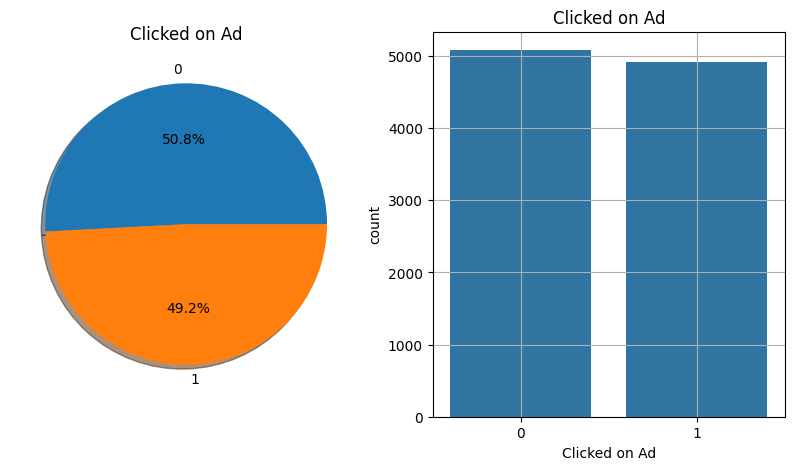

In [35]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

df['Clicked on Ad'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    ax=ax[0],  
    shadow=True 
)
ax[0].set_title('Clicked on Ad')

ax[0].set_ylabel('')

sns.countplot(x='Clicked on Ad', data=df, ax=ax[1])

ax[1].set_title('Clicked on Ad')

plt.grid()

plt.show()

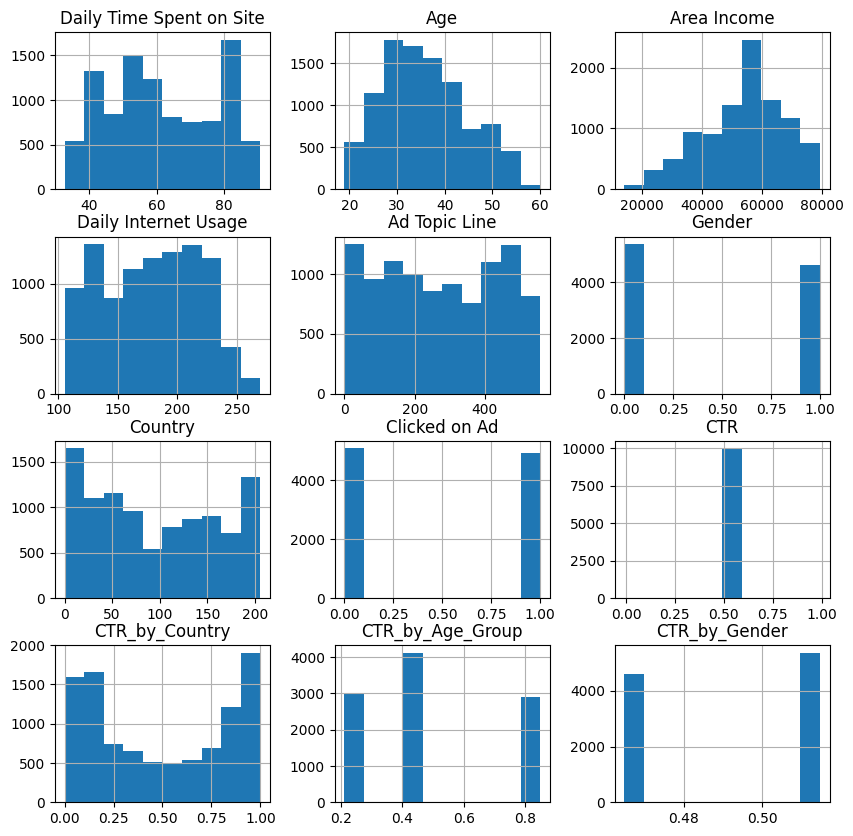

In [36]:
df.hist(bins=10, figsize=(10, 10))

plt.show()

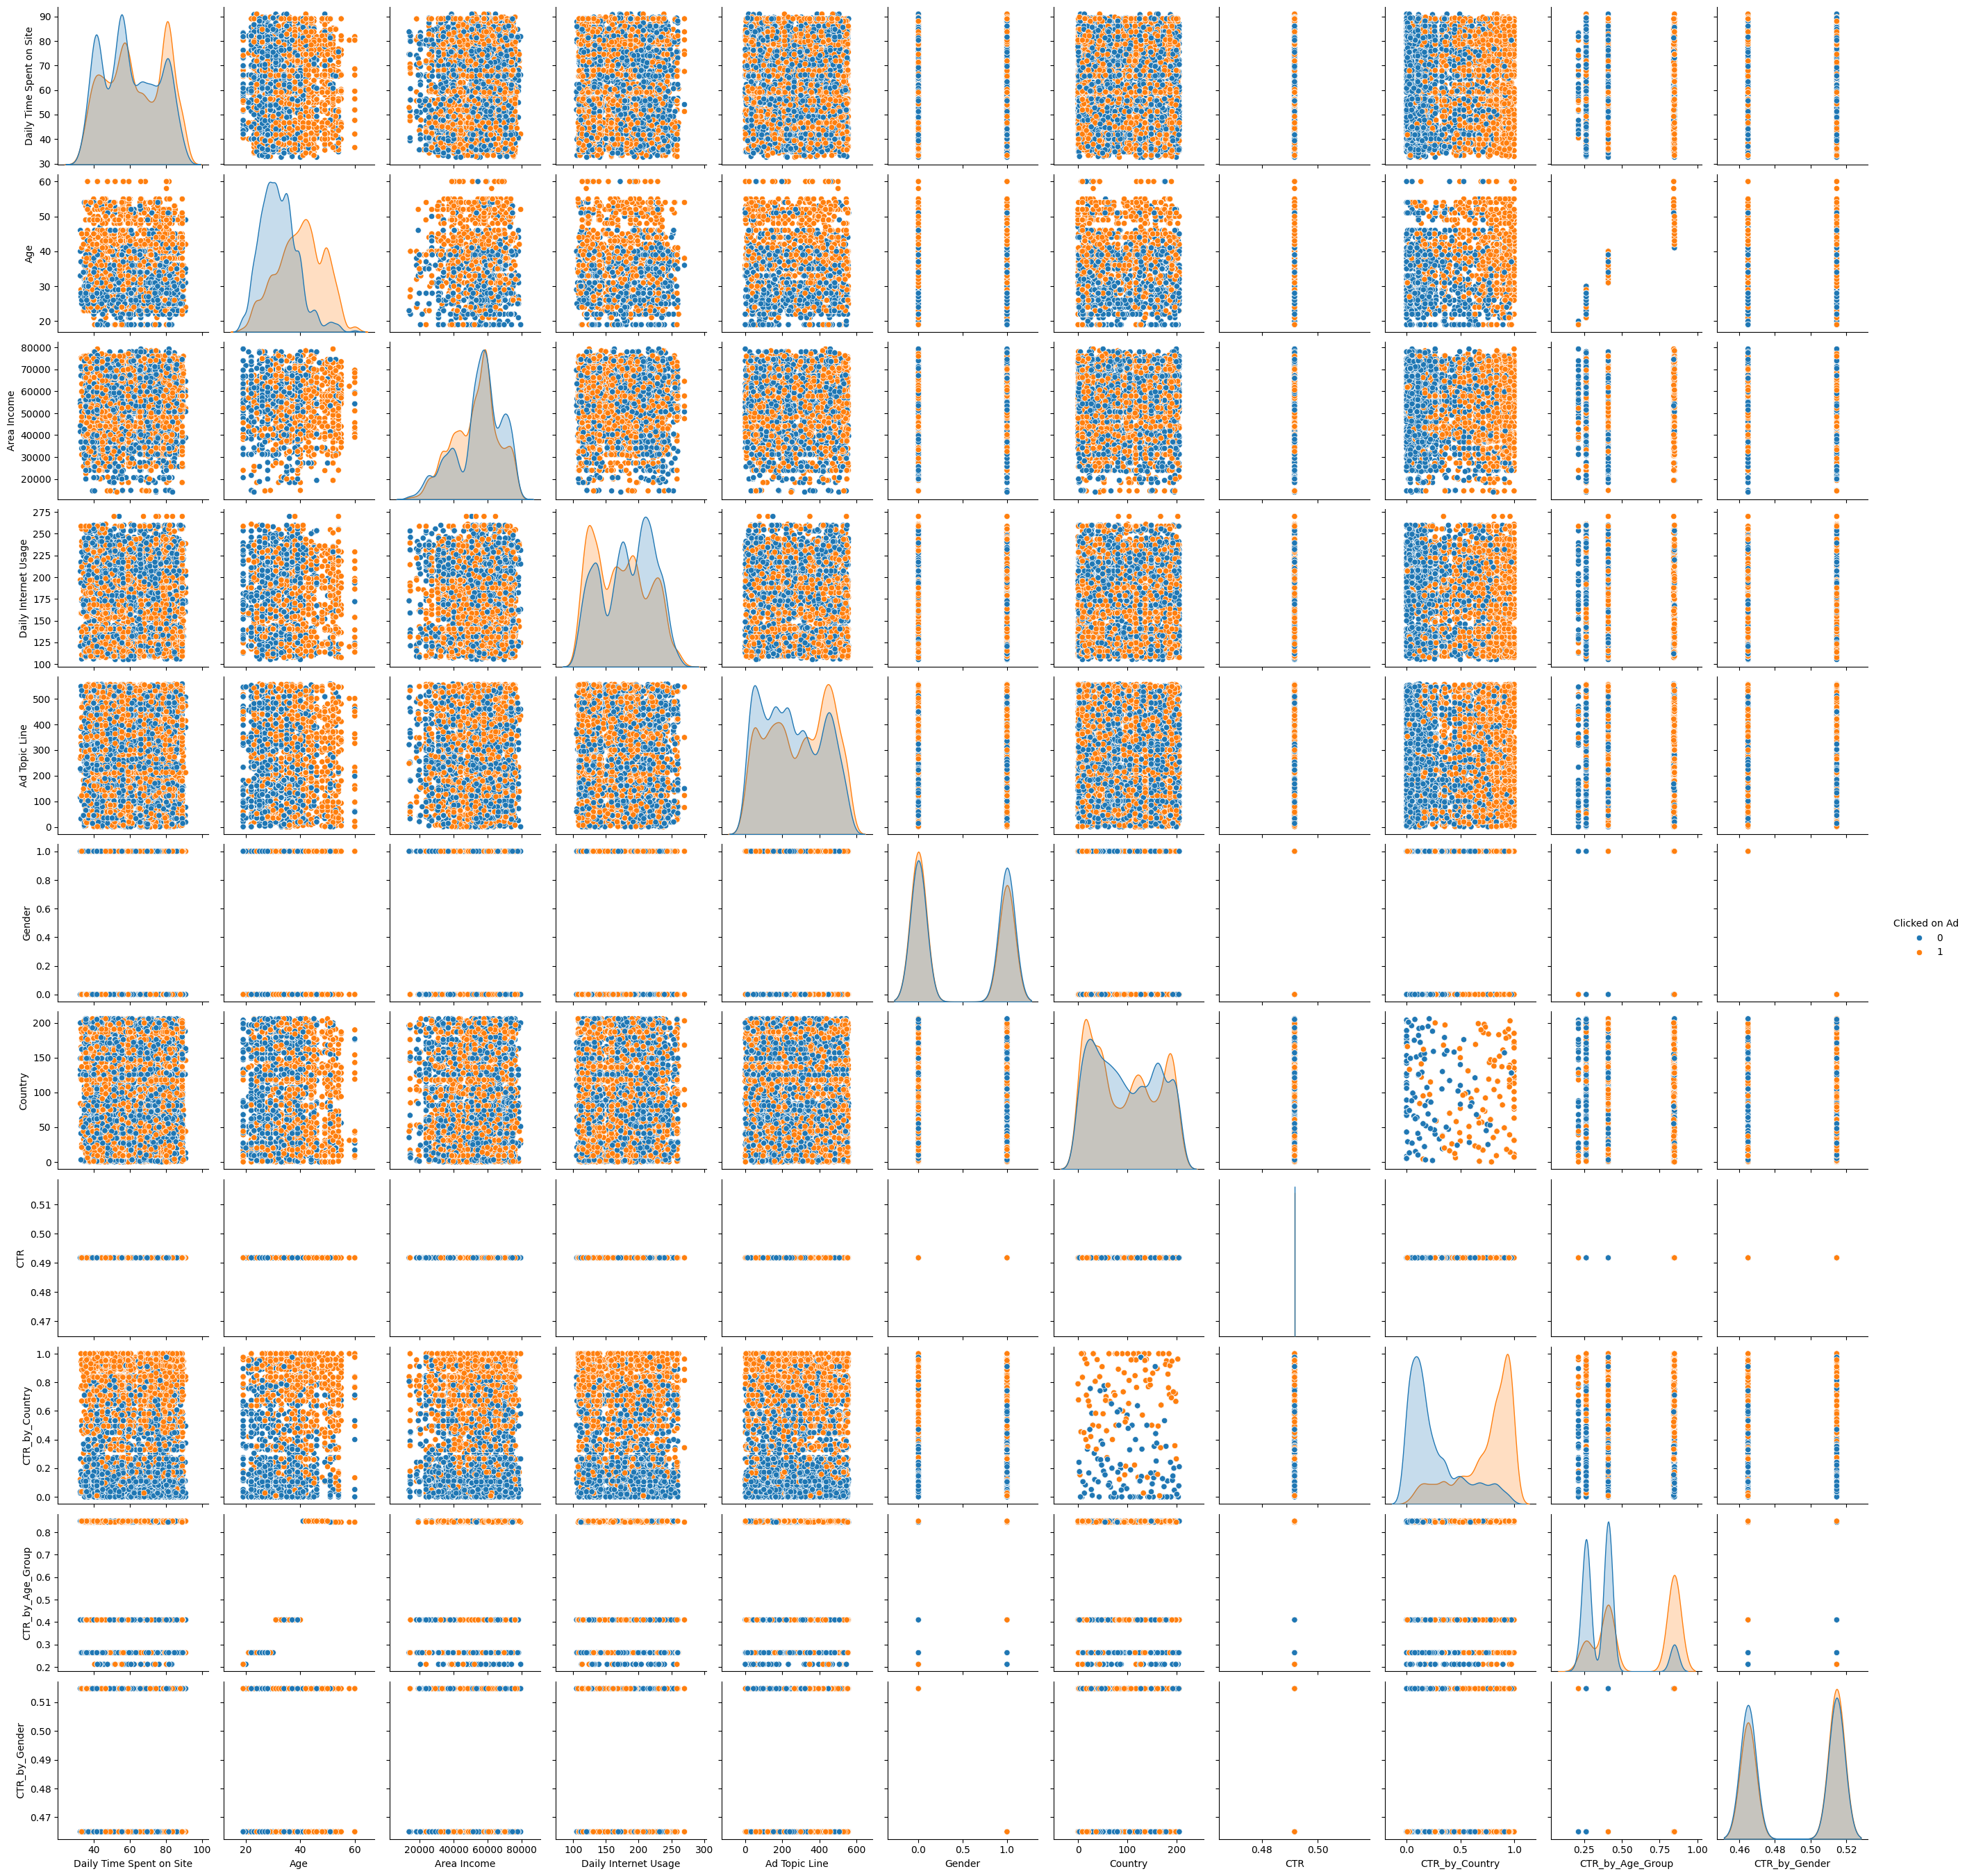

In [37]:
sns.pairplot(data=df, hue='Clicked on Ad')

plt.show()

# Printing the information from the dataset

In [8]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
df['Daily Time Spent Bucket'] = pd.qcut(df['Daily Time Spent on Site'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [9]:
df.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad     CTR  \
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  0.4917   
1                     Singapore  2016-01-16 17:56:05              0  0.4917   
2                    Guadeloupe  2016-06-29 10:50:45              0  0.4917   
3                        Zambia  2016-06-21 14:32:32              0  0.4917   
4                         Qatar  2016-07-21 10:54:35              1  0.4917   

  Age Group Daily Time Spent Bucket  
0     31-40             Medium-High  
1     31-40                     Low  
2     21-30                     Low  
3     21-30             Medium-High  
4     21-30              Medium-Low

# Encode categorical variables

In [10]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])
df['Ad Topic Line'] = le.fit_transform(df['Ad Topic Line'])

In [11]:
df.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

   Ad Topic Line             City  Gender  Country            Timestamp  \
0             96         Lisafort       1      174  2016-06-09 21:43:05   
1            301  West Angelabury       1      166  2016-01-16 17:56:05   
2            484        Reyesfurt       0       71  2016-06-29 10:50:45   
3             24      New Michael       0      205  2016-06-21 14:32:32   
4            484     West Richard       0      149  2016-07-21 10:54:35   

   Clicked on Ad     CTR Age Group Daily Time Spent Bucket  
0              0  0.4917     31-40             Medium-High  
1              0  0.4917     31-40                     Low  
2              0  0.4917     21-30                     Low  
3              0  0.4917     21-30             Medium-High  
4              1  0.4917     21-30              Medium-Low

## Prepare features for modeling

In [13]:
features = ['Age', 'Area Income', 'Daily Time Spent on Site', 'Gender', 'Country', 'Ad Topic Line']
X = df[features]
y = df['Clicked on Ad']

## Scale features

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

   Ad Topic Line             City  Gender  Country            Timestamp  \
0             96         Lisafort       1      174  2016-06-09 21:43:05   
1            301  West Angelabury       1      166  2016-01-16 17:56:05   
2            484        Reyesfurt       0       71  2016-06-29 10:50:45   
3             24      New Michael       0      205  2016-06-21 14:32:32   
4            484     West Richard       0      149  2016-07-21 10:54:35   

   Clicked on Ad     CTR Age Group Daily Time Spent Bucket  
0              0  0.4917     31-40             Medium-High  
1              0  0.4917     31-40                     Low  
2              0  0.4917     21-30                     Low  
3              0  0.4917     21-30             Medium-High  
4              1  0.4917     21-30              Medium-Low

## Correlation matrix

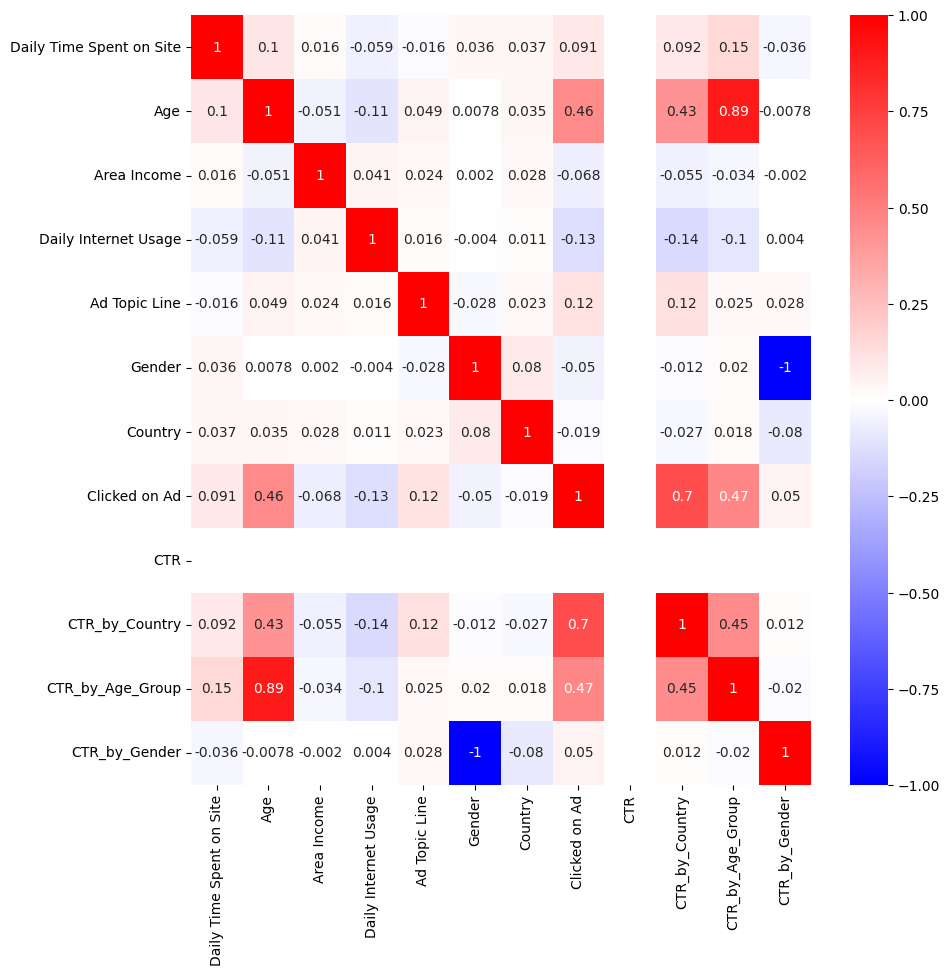

In [41]:
import numpy as np
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix on the numeric columns
corrmat = df_numeric.corr()

top_corr_features = corrmat.index

# Plot the heatmap
plt.figure(figsize=(10, 10))
g = sns.heatmap(df_numeric[top_corr_features].corr(),
                annot=True,
                cmap='bwr')
plt.show()

## Split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Initialize models

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

In [17]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression": lr_model
}

In [18]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


Random Forest Results:
Accuracy: 83.00%
Confusion Matrix:
[[644 120]
 [135 601]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       764
           1       0.83      0.82      0.82       736

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500


Gradient Boosting Results:
Accuracy: 81.87%
Confusion Matrix:
[[656 108]
 [164 572]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       764
           1       0.84      0.78      0.81       736

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500


Logistic Regression Results:
Accuracy: 73.00%
Confusion Matrix:
[[595 169]
 [236 500]]
Classification Report:
              precisi

## Confusion Matrix

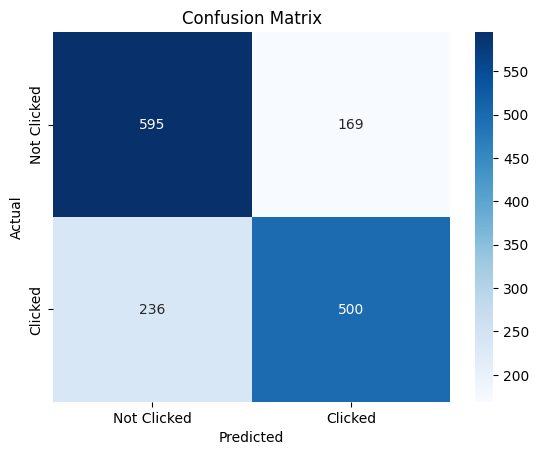

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance for Random Forest and Gradient Boosting

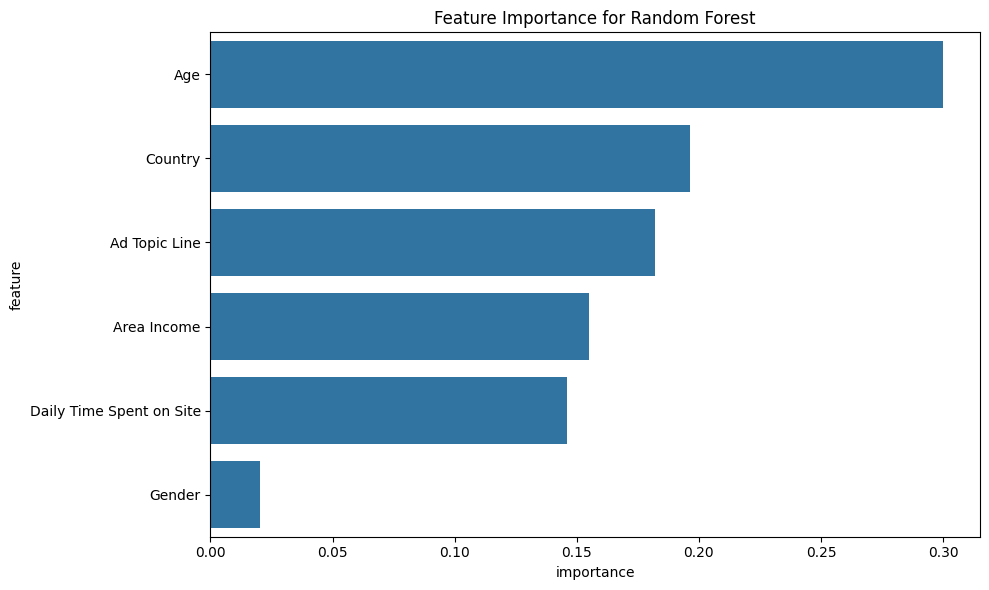


Random Forest Feature Importance:
                    feature  importance
0                       Age    0.300106
4                   Country    0.196555
5             Ad Topic Line    0.182083
1               Area Income    0.155198
2  Daily Time Spent on Site    0.145934
3                    Gender    0.020125


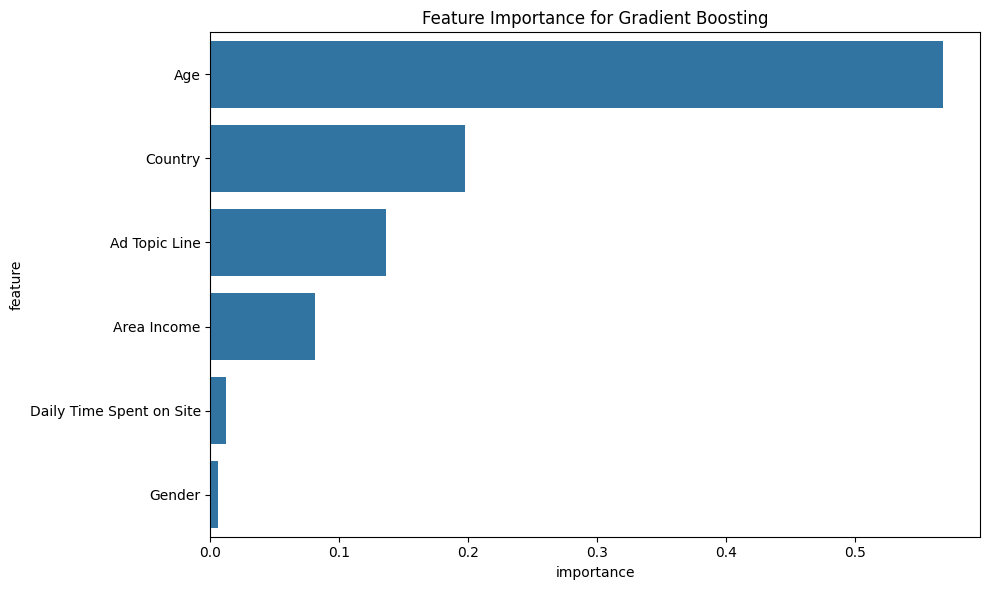


Gradient Boosting Feature Importance:
                    feature  importance
0                       Age    0.568230
4                   Country    0.197571
5             Ad Topic Line    0.136012
1               Area Income    0.080712
2  Daily Time Spent on Site    0.011879
3                    Gender    0.005595


In [20]:
for name in ["Random Forest", "Gradient Boosting"]:
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': models[name].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {name}')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{name} Feature Importance:")
    print(feature_importance)

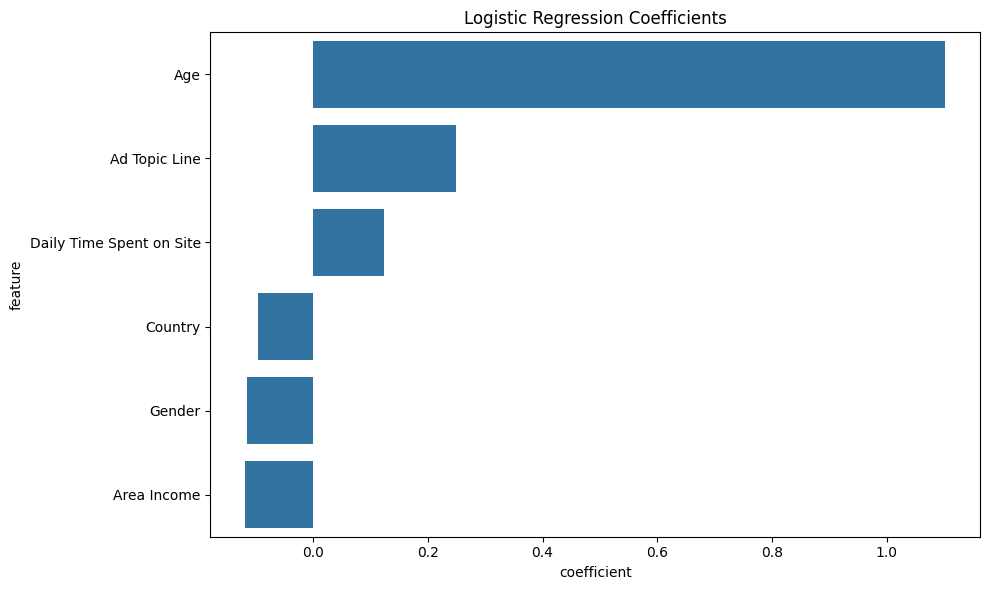


Logistic Regression Coefficients:
                    feature  coefficient
0                       Age     1.101882
5             Ad Topic Line     0.248635
2  Daily Time Spent on Site     0.123791
4                   Country    -0.096502
3                    Gender    -0.115306
1               Area Income    -0.118181


In [21]:
lr_coefficients = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=lr_coefficients)
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

print("\nLogistic Regression Coefficients:")
print(lr_coefficients)

# ROC Curve comparison

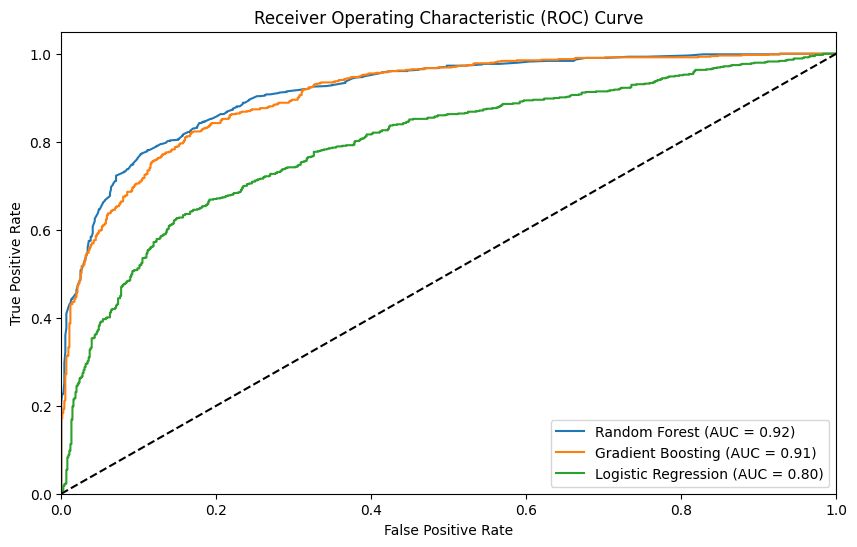

In [22]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
df['CTR_by_Country'] = df.groupby('Country')['Clicked on Ad'].transform('mean')
df['CTR_by_Age_Group'] = df.groupby('Age Group')['Clicked on Ad'].transform('mean')
df['CTR_by_Gender'] = df.groupby('Gender')['Clicked on Ad'].transform('mean')

print("\nTop 5 Countries by CTR:")
print(df.groupby('Country')['CTR_by_Country'].first().sort_values(ascending=False).head())

print("\nCTR by Age Group:")
print(df.groupby('Age Group')['CTR_by_Age_Group'].first().sort_values(ascending=False))

print("\nCTR by Gender:")
print(df.groupby('Gender')['CTR_by_Gender'].first())


Top 5 Countries by CTR:
Country
7     1.0
11    1.0
32    1.0
76    1.0
63    1.0
Name: CTR_by_Country, dtype: float64

CTR by Age Group:
Age Group
41-50    0.849242
51-60    0.844479
31-40    0.409466
21-30    0.263231
0-20     0.211538
60+           NaN
Name: CTR_by_Age_Group, dtype: float64

CTR by Gender:
Gender
0    0.514695
1    0.464965
Name: CTR_by_Gender, dtype: float64


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming the Random Forest model, scaler, and encoders are already defined
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Define encoders used in the model training
label_encoders = {
    'Gender': le,
    'Country': le,
    'Ad Topic Line': le
}

def safe_transform(encoder, value):
    try:
        return encoder.transform([value])[0]
    except:
        # Handle unseen labels by assigning a default value or encoding it as a new category
        return -1  # Assign a default value for unseen categories

def predict_ad_click_rf(daily_time_spent, age, area_income, daily_internet_usage, gender, country, ad_topic_line):
    # Create a DataFrame for the user input
    input_data = pd.DataFrame({
        'Daily Time Spent on Site': [daily_time_spent],
        'Age': [age],
        'Area Income': [area_income],
        'Daily Internet Usage': [daily_internet_usage],
        'Gender': [gender],
        'Country': [country],
        'Ad Topic Line': [ad_topic_line]
    })
    
    # Encode categorical variables safely
    for column in ['Gender', 'Country', 'Ad Topic Line']:
        input_data[column] = input_data[column].apply(lambda x: safe_transform(label_encoders[column], x))
    
    # Select features
    X_input = input_data[['Age', 'Area Income', 'Daily Time Spent on Site', 'Gender', 'Country', 'Ad Topic Line']]
    
    # Scale features
    X_input_scaled = scaler.transform(X_input)
    
    # Make prediction
    prediction = rf_model.predict(X_input_scaled)[0]
    prediction_proba = rf_model.predict_proba(X_input_scaled)[:, 1][0]
    
    result = {
        "Prediction": "Clicked" if prediction == 1 else "Not Clicked",
        "Probability of Click": prediction_proba
    }
    
    return result

# Example usage
if __name__ == "__main__":
    daily_time_spent = float(input("Enter Daily Time Spent on Site: "))
    age = float(input("Enter Age: "))
    area_income = float(input("Enter Area Income: "))
    daily_internet_usage = float(input("Enter Daily Internet Usage: "))
    gender = input("Enter Gender (Male/Female): ")
    country = input("Enter Country: ")
    ad_topic_line = input("Enter Ad Topic Line: ")
    
    result = predict_ad_click_rf(daily_time_spent, age, area_income, daily_internet_usage, gender, country, ad_topic_line)
    
    print("\nRandom Forest Prediction Results:")
    print(f"Prediction: {result['Prediction']}")
    print(f"Probability of Click: {result['Probability of Click']:.2f}")

Enter Daily Time Spent on Site:  82.07
Enter Age:  51
Enter Area Income:  74535.94
Enter Daily Internet Usage:  130.41
Enter Gender (Male/Female):  Female
Enter Country:  159
Enter Ad Topic Line:  240



Random Forest Prediction Results:
Prediction: Clicked
Probability of Click: 0.73


In [26]:
# 5185 -> clicked -> ok (rf)
# 3701 -> clicked -> ok (rf)
# 9289 -> clicked -> ok (rf)
# 2371 -> clikced -> ok
# 755 -> cliked -> ok

In [27]:
# 1460 -> noclicked -> ok
# 1349 -> noclicked -> ok
# 6166 -> nocliked -> ok
# 4539 -> noclikced -> ok
# 7203 -> noclikced -> ok